In [ ]:
# Put your data cleaning/preparation code with comments here
# The code should begin from reading the training data
# The code should end when you obtain the data used for the model in Question 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn import metrics
from sklearn import impute


from sklearn.model_selection import train_test_split, cross_val_score, train_test_split, cross_val_predict,\
cross_validate, KFold, StratifiedKFold, RepeatedKFold, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, roc_curve, auc,recall_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [ ]:
# sset = pd.read_csv("train_regression.csv")
# sset["bathrooms_text"]=sset["bathrooms_text"].apply(null_to_none)

In [ ]:
# sset["bathrooms_text"].unique()

In [ ]:
training_dataset=pd.read_csv("train_regression.csv")#54 columns
training_dataset

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53872917,366516391,2018-04-09,"Chicago, IL",within an hour,96%,95%,f,Back of the Yards,11,...,5.00,5.00,4.28,4.83,f,9,1,8,0,0.33
1,39269663,50276775,2014-12-23,NaN,within an hour,100%,97%,f,Clearwater Beach,1141,...,NaN,NaN,NaN,NaN,t,58,0,58,0,NaN
2,556480733030442463,681680651,2020-03-08,NaN,within an hour,100%,100%,f,Lake View East,1,...,5.00,5.00,4.93,4.80,f,1,1,0,0,2.78
3,52397280,94345291,2015-10-22,"Chicago, IL",within an hour,100%,98%,f,Bucktown,55,...,4.38,4.23,4.54,3.85,t,55,55,0,0,3.61
4,745949202271858960,790998106,2021-04-04,"Chicago, IL",within an hour,100%,100%,t,Near South Side,74,...,4.83,4.85,4.74,4.72,t,74,74,0,0,3.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,41561598,469571763,2019-01-06,"Chicago, IL",within a few hours,88%,84%,t,Rogers Park,2,...,5.00,4.99,4.98,4.96,f,2,0,2,0,1.32
4996,38350907,981504375,2022-12-08,"Chicago, IL",within an hour,100%,89%,t,Irving Park,8,...,4.75,4.90,4.98,4.56,f,8,8,0,0,13.11
4997,913493910258754935,284822054,2017-07-25,"Chicago, IL",within an hour,100%,97%,f,North Park,4,...,4.94,5.00,4.97,4.86,f,3,3,0,0,0.70
4998,825392040226364970,214868994,2016-12-16,"New York, NY",within an hour,100%,97%,f,Cambridge,4820,...,NaN,NaN,NaN,NaN,f,643,643,0,0,NaN


In [ ]:
test_dataset= pd.read_csv("test_regression.csv") # don't touch this other than cleaning
# test_dataset

In [ ]:
#dropping
training_dataset = training_dataset.drop(["id", "host_id", "host_since","first_review","last_review"], axis=1)
test_dataset=test_dataset.drop(["id", "host_id", "host_since","first_review","last_review"], axis=1)

In [ ]:
# training_dataset.dtypes

In [ ]:
#cleaning the price: removing the dollar sign
training_dataset.replace('[\$,]', '', regex=True, inplace=True)

#cleaning the  % sign
training_dataset[["host_acceptance_rate",'host_response_rate']] = training_dataset[["host_acceptance_rate",'host_response_rate']].apply(lambda x: x.str.replace(r'%', ''))

#converting to a float
training_dataset[['price','host_response_rate',"host_acceptance_rate",'beds','number_of_reviews']]=training_dataset[['price','host_response_rate',"host_acceptance_rate",'beds','number_of_reviews']].apply(lambda x: pd.to_numeric(x,errors = 'coerce'))

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_154228/3849424866.py:2: SyntaxWarning: invalid escape sequence '\$'
  training_dataset.replace('[\$,]', '', regex=True, inplace=True)


In [ ]:
# training_dataset.dtypes

In [ ]:
numeric_df = training_dataset.select_dtypes(include=['number'])
#numeric_df.index = training_dataset.index #setting the indices of the numeric df to be the same as original df to replace imputed values with original ones easily. not necissary because it's not index of rows that needs not to change but index of columns
numeric_df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='obj

In [ ]:
non_numeric_columns = training_dataset.columns.difference(numeric_df.columns)

# Select the non-numeric columns
non_numeric_df = training_dataset[non_numeric_columns]
non_numeric_df

,bathrooms_text,has_availability,host_has_profile_pic,host_identity_verified,host_is_superhost,host_location,host_neighbourhood,host_response_time,host_verifications,instant_bookable,neighbourhood_cleansed,property_type,room_type
0,1 shared bath,t,t,t,f,Chicago IL,Back of the Yards,within an hour,['email' 'phone'],f,New City,Private room in rental unit,Private room
1,3 baths,t,t,t,f,NaN,Clearwater Beach,within an hour,['email' 'phone'],t,Near North Side,Room in hotel,Private room
2,1 bath,t,t,t,f,NaN,Lake View East,within an hour,['phone'],f,Lake View,Entire rental unit,Entire home/apt
3,1 bath,t,t,t,f,Chicago IL,Bucktown,within an hour,['email' 'phone' 'work_email'],t,Hyde Park,Entire rental unit,Entire home/apt
4,2 baths,t,t,t,t,Chicago IL,Near South Side,within an hour,['email' 'phone'],t,Near South Side,Entire rental unit,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1 private bath,t,t,t,t,Chicago IL,Rogers Park,within a few hours,['email' 'phone'],f,Rogers Park,Private room in guest suite,Private room
4996,1 bath,t,t,t,t,Chicago IL,Irving Park,within an hour,['email' 'phone'],f,Lake View,Entire rental unit,Entire home/apt
4997,1 bath,t,t,t,f,Chicago IL,North Park,within an hour,['email' 'phone'],f,North Park,Entire rental unit,Entire home/apt
4998,1 bath,t,t,t,f,New York NY,Cambridge,within an hour,['email' 'phone' 'work_email'],f,Lake View,Entire rental unit,Entire home/apt


In [ ]:
#finding what numeric columns have missing values
index = numeric_df.isnull().sum() != 0

In [ ]:
names_columns_missing_data=numeric_df.columns[index]
names_columns_missing_data

Index(['host_response_rate', 'host_acceptance_rate', 'beds',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [ ]:
index_columns_missing_data = np.where(numeric_df.isnull().sum())
index_columns_missing_data[0]

array([ 0,  1,  7, 24, 25, 26, 27, 28, 29, 30, 35])

In [ ]:
#missing value imoutation

missing_value_cols=index_columns_missing_data[0]
#Create an object of type MinMaxScaler
scaler = sk.preprocessing.MinMaxScaler()

#Use the object method 'fit_transform' to scale the values to a standard uniform distribution
scaled_data = pd.DataFrame(scaler.fit_transform(numeric_df.iloc[:,missing_value_cols]))

#Define an object of type KNNImputer
imputer = impute.KNNImputer(n_neighbors=5, weights="uniform")#chose n_neighbors to be 5

#Use the object method 'fit_transform' to impute missing values
imputed_arr = imputer.fit_transform(scaled_data)

#Use the object method 'inverse_transform' to scale back the values to the original scale of the data
unscaled_data = scaler.inverse_transform(imputed_arr)

#reassining the original data of numerical missing columns to the new imputed values
training_dataset[names_columns_missing_data.to_list()]= unscaled_data


In [ ]:
#dealing with missing categorical variables
#identifying the variables that have missing data
index = non_numeric_df.isnull().sum() != 0
index

bathrooms_text             True
has_availability          False
host_has_profile_pic      False
host_identity_verified    False
host_is_superhost          True
host_location              True
host_neighbourhood         True
host_response_time         True
host_verifications        False
instant_bookable          False
neighbourhood_cleansed    False
property_type             False
room_type                 False
dtype: bool

In [ ]:
#getting names of missing catagoircal data in a vector
names_categ_columns_missing_data=non_numeric_df.columns[index]
names_categ_columns_missing_data

Index(['bathrooms_text', 'host_is_superhost', 'host_location',
       'host_neighbourhood', 'host_response_time'],
      dtype='object')

In [ ]:
#getting index of missing catagoircal data in a vector
index_cat_columns_missing_data = np.where(non_numeric_df.isnull().sum())
index_cat_columns_missing_data[0]

array([0, 4, 5, 6, 7])

In [ ]:
def null_to_none(x):
    if pd.isnull(x): #x=="NaN" didn't work #could put all the other locations in one category called "other"
        return -1#"no_value" // return -1 instead of other
    else:
        return x

non_numeric_df[names_categ_columns_missing_data.to_list()]=non_numeric_df[names_categ_columns_missing_data.to_list()].applymap(null_to_none)

#reassigning the changed variables back into the training dataset
training_dataset[non_numeric_df.columns.to_list()]= non_numeric_df

/tmp/ipykernel_154228/235310872.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_df[names_categ_columns_missing_data.to_list()]=non_numeric_df[names_categ_columns_missing_data.to_list()].applymap(null_to_none)
/tmp/ipykernel_154228/235310872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric_df[names_categ_columns_missing_data.to_list()]=non_numeric_df[names_categ_columns_missing_data.to_list()].applymap(null_to_none)


In [ ]:
training_dataset["bathrooms_text"].unique()

array(['1 shared bath', '3 baths', '1 bath', '2 baths', '3.5 baths',
       '1.5 baths', '1 private bath', '2.5 baths', '4 baths',
       '2 shared baths', '3 shared baths', '1.5 shared baths', '0 baths',
       '11.5 shared baths', '4.5 baths', '6 baths', '5.5 baths',
       '5 baths', '7 baths', '11 shared baths', '2.5 shared baths',
       'Half-bath', '10 baths', 'Shared half-bath', -1, '6.5 baths',
       '8 baths', 'Private half-bath', '9.5 baths'], dtype=object)

In [ ]:
#cleaning bathroom_text
training_dataset.loc[training_dataset["bathrooms_text"] == "Shared half-bath", "bathrooms_text"] = "0.5 shared"
training_dataset.loc[training_dataset["bathrooms_text"] == "Private half-bath", "bathrooms_text"] = "0.5 private"
training_dataset.loc[training_dataset["bathrooms_text"] == "Half-bath", "bathrooms_text"] = "0.5 bath"

#function to extract number in bathroon_text: dividing the number of bathrooms by 2 if it's a shared bathroom
def extract_number (x):
    if len(x)>0:
        list_of_strings=x.split()
        if "shared" in list_of_strings:
            number= float(list_of_strings[0])
            return number/2
        else:
            return list_of_strings[0]
    else:
        return -1 #this isn't other - can I return zero?

#apply the function
training_dataset["bathrooms_text_numbers"]=training_dataset["bathrooms_text"].astype(str).apply(extract_number)
#dropping None rows
# ind_to_drop = training_dataset.loc[training_dataset["bathrooms_text_numbers"].isin(["None"]),:].index.to_list()
# training_dataset = training_dataset.drop(ind_to_drop, axis=0)

#converting column to numeric
training_dataset["bathrooms_text_numbers"]=training_dataset["bathrooms_text_numbers"].astype(float)
#drop the bathroom text column
training_dataset=training_dataset.drop("bathrooms_text", axis=1)

In [ ]:
training_dataset["bathrooms_text_numbers"]

0       0.5
1       3.0
2       1.0
3       1.0
4       2.0
       ... 
4995    1.0
4996    1.0
4997    1.0
4998    1.0
4999    1.0
Name: bathrooms_text_numbers, Length: 5000, dtype: float64

In [ ]:
list_info=training_dataset["property_type"].value_counts()
# list_info

In [ ]:
##cleaning property_type

list_info=training_dataset["property_type"].value_counts().sort_values(ascending=False)
top_property_types=list_info.index[:3] #changed this from 15 to 3

def clean_property_type_step1 (x):
    if x in top_property_types:
        return x
    else:
        list_of_words= x.split()
        if "Shared" in list_of_words:
            return "Shared room"
        if "Private" in list_of_words:
            return "Private room"

training_dataset["property_type"]=training_dataset["property_type"].apply(clean_property_type_step1) #have 17 property types left

def clean_property_type_step2 (x):
    if x in top_property_types:
        return x
    else:
        return "other"
training_dataset["property_type"]=training_dataset["property_type"].apply(clean_property_type_step2) #have 17 property types left


In [ ]:
#cleaning location
def classify_host_location(x):
    if x in ['Chicago, IL','New York, NY','United States','Skokie, IL','Springfield, IL','Los Angeles, CA','Tampa, FL','San Francisco, CA','Niles, IL',
 'Naples, FL']:
        return x
    else:
        return "other"

training_dataset["host_location"] =training_dataset["host_location"].apply(classify_host_location)

In [ ]:
# training_dataset["host_neighbourhood"].value_counts()

In [ ]:
# top_neihgborhoods

In [ ]:
#cleaninng host neighborhood
top_neihgborhoods=training_dataset["host_neighbourhood"].value_counts().sort_values(ascending=False)[:3].index.to_list()

def classify_host_neighboorhood(x):
    if x in top_neihgborhoods:
        return x
    else:
        return "other"
training_dataset["host_neighbourhood"] =training_dataset["host_neighbourhood"].apply(classify_host_neighboorhood)


In [ ]:
# training_dataset["neighbourhood_cleansed"].value_counts().sort_values(ascending=False)[:3].index.to_list()


In [ ]:
# test_dataset["neighbourhood_cleansed"].value_counts().sort_values(ascending=False)[:3].index.to_list()

In [ ]:
#cleaning neighboorhod_cleansed
top_neighborhood_cleansed=training_dataset["neighbourhood_cleansed"].value_counts().sort_values(ascending=False)[:3].index.to_list()

def classify_neighboorhood_cleansed(x):
    if x in top_neighborhood_cleansed:
        return x
    else:
        return "other"
training_dataset["neighbourhood_cleansed"] =training_dataset["neighbourhood_cleansed"].apply(classify_neighboorhood_cleansed)

# training_dataset=full_dataset.fillna(method = 'ffill')

In [ ]:
#cleanining hte Null values -
# def clean_null

In [ ]:
# missing_values_indices = np.where(training_dataset["host_response_time"].isnull())
# missing_values_indices[0]

In [ ]:
# training_dataset.iloc[missing_values_indices[0],1]

In [ ]:
# training_dataset.isnull().sum()

In [ ]:
#training_dataset=training_dataset.fillna(method = 'ffill') - won't run anymore

In [ ]:
#taking the log of response varaible
training_dataset["log_price"]=np.log(training_dataset["price"])

In [ ]:
#assigning the x and y variables
X_train = training_dataset.drop(["price","log_price"], axis=1)
y_train = training_dataset["log_price"]

In [ ]:
#converting true false data to numerical data
# def to_binary(x):
#     if x== "yes":
#         return 1
#     else:
#         return 0

def to_binary(column):
    return column.apply(lambda x: 1 if x == 't' or x == 'True' else 0)

X_train[["has_availability", "host_has_profile_pic","host_identity_verified","host_is_superhost","instant_bookable"]] = X_train[["has_availability", "host_has_profile_pic","host_identity_verified","host_is_superhost","instant_bookable"]].apply(to_binary)

In [ ]:
#getting dummies - will use this in all the training
X_train_dummies=pd.get_dummies(X_train, drop_first=True)

def to_binary_boolean(column):
    return column.apply(lambda x: 1 if x == True else 0)

X_train_dummies=X_train_dummies.apply(to_binary_boolean)

In [ ]:
#doing same for test data
#cleaning the price: removing the dollar sign
test_dataset.replace('[\$,]', '', regex=True, inplace=True)

#cleaning the  % sign
test_dataset[["host_acceptance_rate",'host_response_rate']] = test_dataset[["host_acceptance_rate",'host_response_rate']].apply(lambda x: x.str.replace(r'%', ''))

#converting to a float
test_dataset[['host_response_rate',"host_acceptance_rate",'beds','number_of_reviews']]=test_dataset[['host_response_rate',"host_acceptance_rate",'beds','number_of_reviews']].apply(lambda x: pd.to_numeric(x,errors = 'coerce'))

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_154228/1319889790.py:3: SyntaxWarning: invalid escape sequence '\$'
  test_dataset.replace('[\$,]', '', regex=True, inplace=True)


In [ ]:
numeric_df = test_dataset.select_dtypes(include=['number'])
non_numeric_columns = test_dataset.columns.difference(numeric_df.columns)

# Select the non-numeric columns
non_numeric_df = test_dataset[non_numeric_columns]

#finding what numeric columns have missing values
index = numeric_df.isnull().sum() != 0

names_columns_missing_data=numeric_df.columns[index]

index_columns_missing_data = np.where(numeric_df.isnull().sum())

#missing value imoutation

missing_value_cols=index_columns_missing_data[0]
#Create an object of type MinMaxScaler
scaler = sk.preprocessing.MinMaxScaler()

#Use the object method 'fit_transform' to scale the values to a standard uniform distribution
scaled_data = pd.DataFrame(scaler.fit_transform(numeric_df.iloc[:,missing_value_cols]))

#Define an object of type KNNImputer
imputer = impute.KNNImputer(n_neighbors=5, weights="uniform")#chose n_neighbors to be 5

#Use the object method 'fit_transform' to impute missing values
imputed_arr = imputer.fit_transform(scaled_data)

#Use the object method 'inverse_transform' to scale back the values to the original scale of the data
unscaled_data = scaler.inverse_transform(imputed_arr)

#reassining the original data of numerical missing columns to the new imputed values
test_dataset[names_columns_missing_data.to_list()]= unscaled_data

#dealing with missing categorical variables
#identifying the variables that have missing data
index = non_numeric_df.isnull().sum() != 0

#getting names of missing catagoircal data in a vector
names_categ_columns_missing_data=non_numeric_df.columns[index]

#getting index of missing catagoircal data in a vector
index_cat_columns_missing_data = np.where(non_numeric_df.isnull().sum())

#null to none cleaning
non_numeric_df[names_categ_columns_missing_data.to_list()]=non_numeric_df[names_categ_columns_missing_data.to_list()].applymap(null_to_none)

#reassigning the changed variables back into the training dataset
test_dataset[non_numeric_df.columns.to_list()]= non_numeric_df

/tmp/ipykernel_154228/2720000875.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_df[names_categ_columns_missing_data.to_list()]=non_numeric_df[names_categ_columns_missing_data.to_list()].applymap(null_to_none)
/tmp/ipykernel_154228/2720000875.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric_df[names_categ_columns_missing_data.to_list()]=non_numeric_df[names_categ_columns_missing_data.to_list()].applymap(null_to_none)


In [ ]:
#cleaning bathroom_text
test_dataset.loc[test_dataset["bathrooms_text"] == "Shared half-bath", "bathrooms_text"] = "0.5 shared"
test_dataset.loc[test_dataset["bathrooms_text"] == "Private half-bath", "bathrooms_text"] = "0.5 private"
test_dataset.loc[test_dataset["bathrooms_text"] == "Half-bath", "bathrooms_text"] = "0.5 bath"

#function to extract number in bathroon_text: dividing the number of bathrooms by 2 if it's a shared bathroom
def extract_number (x):
    if len(x)>0:
        list_of_strings=x.split()
        if "shared" in list_of_strings:
            number= float(list_of_strings[0])
            return number/2
        else:
            return list_of_strings[0]
    else:
        return -1

#apply the function
test_dataset["bathrooms_text_numbers"]=test_dataset["bathrooms_text"].astype(str).apply(extract_number)
#dropping None rows
# ind_to_drop = test_dataset.loc[test_dataset["bathrooms_text_numbers"].isin(["None"]),:].index.to_list()
# test_dataset = test_dataset.drop(ind_to_drop, axis=0)

#converting column to numeric
test_dataset["bathrooms_text_numbers"]=test_dataset["bathrooms_text_numbers"].astype(float)

#dropping bathroom text cause we don't need it
test_dataset=test_dataset.drop("bathrooms_text", axis=1)

In [ ]:
top_property_types

Index(['Entire rental unit', 'Entire condo', 'Private room in rental unit'], dtype='object', name='property_type')

In [ ]:
##cleaning property_type

list_info=test_dataset["property_type"].value_counts().sort_values(ascending=False)
top_property_types=list_info.index[:3]

def clean_property_type_step1 (x):
    if x in top_property_types:
        return x
    else:
        list_of_words= x.split()
        if "Shared" in list_of_words:
            return "Shared room"
        if "Private" in list_of_words:
            return "Private room"

test_dataset["property_type"]=test_dataset["property_type"].apply(clean_property_type_step1) #have 17 property types left

def clean_property_type_step2 (x):
    if x in top_property_types:
        return x
    else:
        return "other"
test_dataset["property_type"]=test_dataset["property_type"].apply(clean_property_type_step2) #have 17 property types left


#cleaning location
def classify_host_location(x):
    if x in ['Chicago, IL','New York, NY','United States','Skokie, IL','Springfield, IL','Los Angeles, CA','Tampa, FL','San Francisco, CA','Niles, IL',
 'Naples, FL']:
        return x
    else:
        return "other"

test_dataset["host_location"] =test_dataset["host_location"].apply(classify_host_location)

In [ ]:
#cleaninng host neighborhood
top_neihgborhoods=test_dataset["host_neighbourhood"].value_counts().sort_values(ascending=False)[:3].index.to_list()

def classify_host_neighboorhood(x):
    if x in top_neihgborhoods:
        return x
    else:
        return "other"
test_dataset["host_neighbourhood"] =test_dataset["host_neighbourhood"].apply(classify_host_neighboorhood)



In [ ]:
#cleaning neighboorhod_cleansed
top_neighborhood_cleansed=test_dataset["neighbourhood_cleansed"].value_counts().sort_values(ascending=False)[:3].index.to_list()

def classify_neighboorhood_cleansed(x):
    if x in top_neighborhood_cleansed:
        return x
    else:
        return "other"
test_dataset["neighbourhood_cleansed"] =test_dataset["neighbourhood_cleansed"].apply(classify_neighboorhood_cleansed)

In [ ]:
# test_dataset=test_dataset.fillna(method = 'ffill')

#assigning x and y test
X_test = test_dataset #price .drop(["price","log_price"], axis=1)
# y_test = training_dataset["log_price"] -not avaialble

def to_binary(column):
    return column.apply(lambda x: 1 if x == 't' or x == 'True' else 0)

X_test[["has_availability", "host_has_profile_pic","host_identity_verified","host_is_superhost","instant_bookable"]] = X_test[["has_availability", "host_has_profile_pic","host_identity_verified","host_is_superhost","instant_bookable"]].apply(to_binary)

#getting dummies - will use this in all the training
X_test_dummies=pd.get_dummies(X_test, drop_first=True)

def to_binary_boolean(column):
    return column.apply(lambda x: 1 if x == True else 0)

X_test_dummies=X_test_dummies.apply(to_binary_boolean)

In [ ]:
#X_train: X_train_dummies
#y_train: y_tarin
#X_test: X_test_dummies

In [ ]:
#bagging
#finding best n_estimators
oob_rmse = []

tree_number_values = np.arange(10,400, 40) #how to determine the range of this

for tree in tree_number_values:
    base_model = DecisionTreeRegressor(random_state=1)
    model = BaggingRegressor(estimator = base_model, n_estimators = tree, oob_score=True, random_state = 1)
    #model = RandomForestRegressor(random_state=1, n_estimators = tree, oob_score=True)
    model.fit(X_train_dummies, y_train)
    # Find the OOB performance and store it
    oob_rmse.append(mean_squared_error(y_train, model.oob_prediction_, squared=False))

/projects/e32107/src/stats-303/env2/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:1225: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/projects/e32107/src/stats-303/env2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/projects/e32107/src/stats-303/env2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/projects/e32107/src/stats-303/env2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To

Text(0.5, 0, 'number of trees')

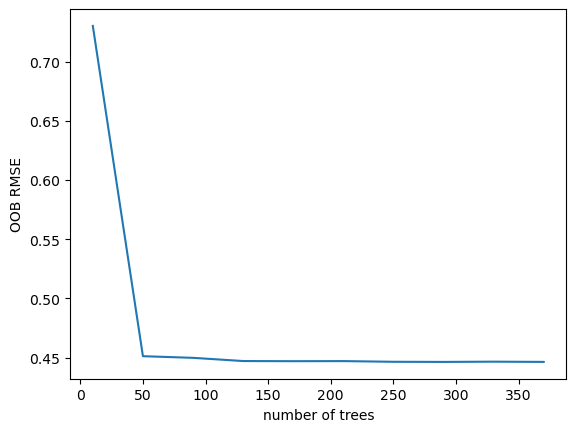

In [ ]:
plt.plot(tree_number_values, oob_rmse)
plt.ylabel('OOB RMSE')
plt.xlabel('number of trees')

In [ ]:
#redoing it with a differnet range -- using RMSE
oob_rmse = []

tree_number_values = np.arange(10,90, 5) #how to determine the range of this

for tree in tree_number_values:
    base_model = DecisionTreeRegressor(random_state=1)
    model = BaggingRegressor(estimator = base_model, n_estimators = tree, oob_score=True, random_state = 1)
    #model = RandomForestRegressor(random_state=1, n_estimators = tree, oob_score=True)
    model.fit(X_train_dummies, y_train)
    # Find the OOB performance and store it
    oob_rmse.append(mean_squared_error(y_train, model.oob_prediction_, squared=False))


/projects/e32107/src/stats-303/env2/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:1225: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/projects/e32107/src/stats-303/env2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/projects/e32107/src/stats-303/env2/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:1225: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/projects/e32107/src/stats-303/env2/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

Text(0.5, 0, 'number of trees')

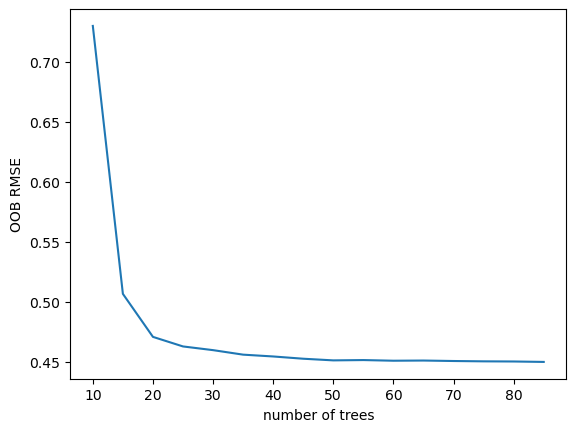

In [ ]:
plt.plot(tree_number_values, oob_rmse)
plt.ylabel('OOB RMSE')
plt.xlabel('number of trees') #n_estiamtors = 20

In [ ]:
base_model = DecisionTreeRegressor(random_state=1)
model = BaggingRegressor(estimator = base_model, n_estimators = 20, random_state = 1)

grid = {
    'max_samples': [0.5, 0.75, 0.9, 1.0],
    'max_features':[0.5, 0.75, 0.9, 1.0],
    'bootstrap':[True, False],
    'bootstrap_features':[True, False]
}

grid_search_cv = GridSearchCV(model, grid, cv = KFold(n_splits=5, shuffle= True, random_state=1),
                              scoring = "neg_root_mean_squared_error",n_jobs=int(os.getenv("SLURM_NPROCS", 1)))

grid_search_cv.fit(X_train_dummies, y_train)

print(-grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

0.48558074986104793
{'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.75, 'max_samples': 0.9}


In [ ]:
#predicting using test data
y_pred=np.exp(grid_search_cv.best_estimator_.predict(X_test_dummies))

In [ ]:
test_info= pd.read_csv("test_regression.csv") # uncleaned, uploading again just because of variable name

In [ ]:
submiss_final=pd.DataFrame(test_info.id)
submiss_final['predicted']=y_pred

In [ ]:
submiss_final.to_csv('submiss_final.csv', index=False)